# **ANÁLISIS PREDICTIVO DEL PRECIO DE LA VIVIENDA.**

# Recolección de los datos.


In [4]:
# Importamos el archivo
from google.colab import files
archivo = files.upload()

Saving data.csv to data.csv


In [5]:
# Importamos pandas y creamos variable para el dataset
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(archivo["data.csv"]))

# Exploración de los datos.

In [6]:
# Número de filas y columnas del dataframe
df.shape

(4600, 18)

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
# Procedemos a renombrar ciertas columnas para hacer más facil su lectura en nuestro entorno de trabajo
df = df.rename(columns = {"price":"precio", "bedrooms":"habitaciones", "bathrooms":"baños",
                                             "sqft_living":"medida_casa", "sqft_lot":"medida_terreno",
                                             "floors":"pisos","waterfront":"vistas_mar", "view":"vistas", "condition":"condicion",
                                             "yr_built":"fecha_const", "yr_renovated":"fecha_reforma","street":"direccion", "city":"ciudad"})

In [9]:
# Revisamos los nombres de todas las columnas
df.columns

Index(['date', 'precio', 'habitaciones', 'baños', 'medida_casa',
       'medida_terreno', 'pisos', 'vistas_mar', 'vistas', 'condicion',
       'sqft_above', 'sqft_basement', 'fecha_const', 'fecha_reforma',
       'direccion', 'ciudad', 'statezip', 'country'],
      dtype='object')

In [10]:
# Miramos los datos estadísticos del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
habitaciones,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
baños,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
medida_casa,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
medida_terreno,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
pisos,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
vistas_mar,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
vistas,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condicion,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [11]:
# Observamos que hay casas con precio 0
(df.precio == 0).sum()

49

In [12]:
# Importo numpy y reemplazamos los valores 0 por "NaN"
import numpy as np
df["precio"].replace(0, np.nan, inplace = True)

In [13]:
# Observamos si hay algún dato nulo en el dataframe
df.isnull().sum()

date               0
precio            49
habitaciones       0
baños              0
medida_casa        0
medida_terreno     0
pisos              0
vistas_mar         0
vistas             0
condicion          0
sqft_above         0
sqft_basement      0
fecha_const        0
fecha_reforma      0
direccion          0
ciudad             0
statezip           0
country            0
dtype: int64

In [14]:
# Eliminamos los valores nulos
df.dropna(inplace = True)
(df.precio == 0).sum()

0

In [15]:
# Confirmamos que no hay más casas a precio 0
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
habitaciones,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
baños,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
medida_casa,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
medida_terreno,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
pisos,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
vistas_mar,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
vistas,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condicion,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


In [16]:
# Me interesa chequear la columna de los paises porque si todas pertenecen al mismo, son datos que no tienen consistencia
paises = df["country"].unique()
paises

array(['USA'], dtype=object)

In [17]:
# Procedemos a eliminar ciertas columnas que no son consistentes:
# - La fecha no nos aporta nada
# - Los pies cuadrados above y basement se suman en la columna living (medida_casa) reuniendo los datos solo en una columna y no en 3
# - Teniendo la ciudad y la direccion, no nos hace falta el código postal y el país (todas pertenecen a USA)
df_casas = df.drop(["date", "sqft_above", "sqft_basement", "statezip", "country"], axis=1)

In [18]:
df_casas

,precio,habitaciones,baños,medida_casa,medida_terreno,pisos,vistas_mar,vistas,condicion,fecha_const,fecha_reforma,direccion,ciudad
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005,18810 Densmore Ave N,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,1921,0,709 W Blaine St,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1966,0,26206-26214 143rd Ave SE,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1963,0,857 170th Pl NE,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992,9105 170th Ave NE,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1954,1979,501 N 143rd St,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1983,2009,14855 SE 10th Pl,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,2009,0,759 Ilwaco Pl NE,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1974,0,5148 S Creston St,Seattle


# Exploración visual de los datos.

In [19]:
 # Importamos matplot y seaborn
 import matplotlib.pyplot as plt
 import seaborn as sns

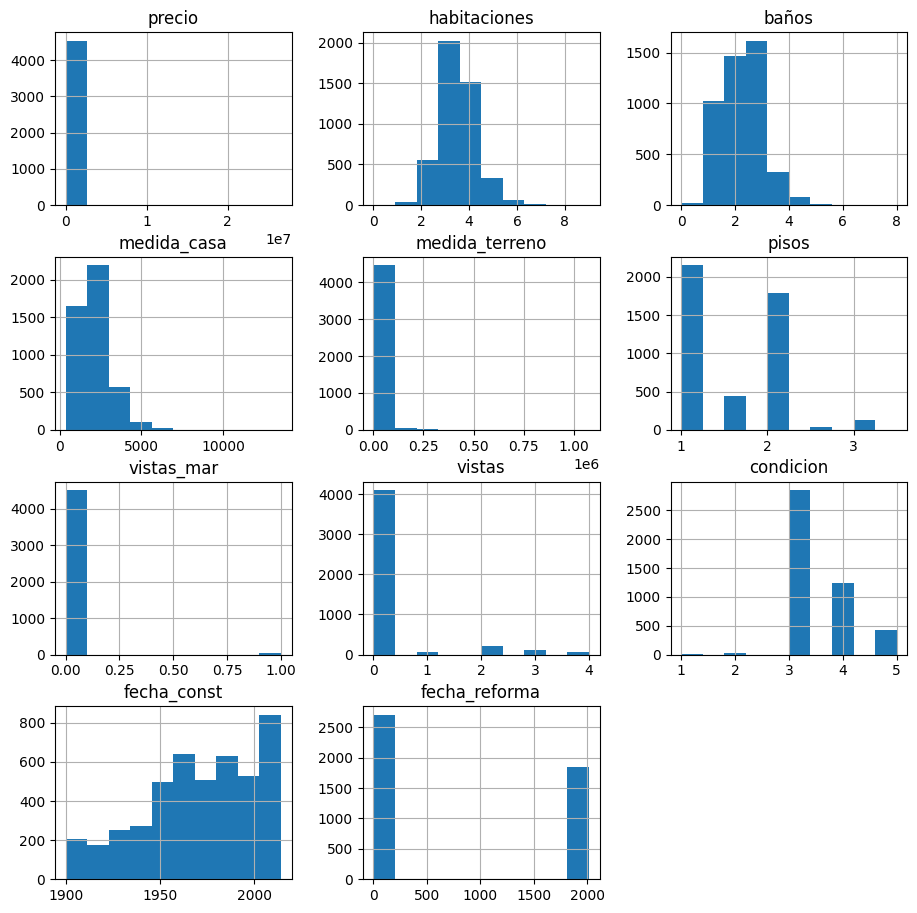

In [20]:
# Sacamos los histogramas por columnas para analizar visualmente
df_casas.hist(figsize=(11,11))
plt.show()

## Análisis de los histogramas.
Con estos histogramas podemos analizar un poco mejor el dataset por columnas con datos que realmente nos interesan. Vamos a describir algunas cositas!!
- Habitaciones: Podemos observar que la mayoría de las casas tienen 3 habitaciones. También hay bastantes casas con 4.
- Baños: Dado que los baños aquí son representados con decimales se nos hace un poco más dificil de analizar. Tiene una explicación lógica, en USA son representados de esta manera según las comodidades del baño, bañera o ducha, lavabo, bidé o no, etc. Es decir, estos datos son una suma de la cantidad de baños de la casa y la calidad de los mismos.
- Medidas de las casa: Podríamos decir que la mayoría de las casas son de un tamaño medio.
- Pisos: La gran mayoría de ellas no tienen más de dos pisos.
- Vistas al mar: Encontramos escasas casas con vistas al mar.
- Vistas: La calidad de las vistas en cada una de ellas suele ser bastante baja o nula puntuando del 1 al 4.
- Condición: La condición de las casas parece ser bastante alta, mostrando el dataframe una escasez de casas en malas condiciones puntuando del 1 al 5.
- Fechas de construcción: Observamos que hay mas casas nuevas que viejas, muchas de ellas construidas en el presente siglo.

## Correlación de las variables.

<ipython-input-21-7aba5b7ccff9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_casas.corr()


<Axes: >

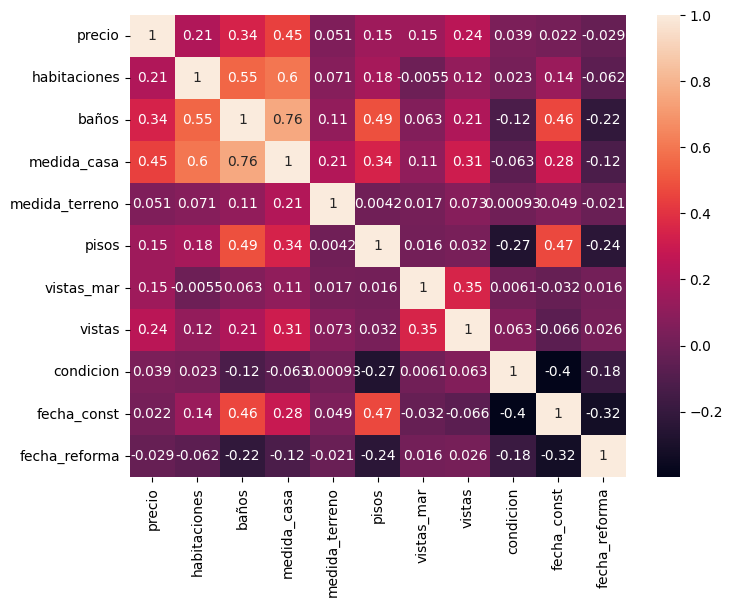

In [21]:
# Analizamos la correlación de las variables
corr = df_casas.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot = True, ax=ax)

## Distribución de variables: Precio vs Medidas, Baños y Habitaciones.

Text(0.5, 1.0, 'Precio vs Habitaciones')

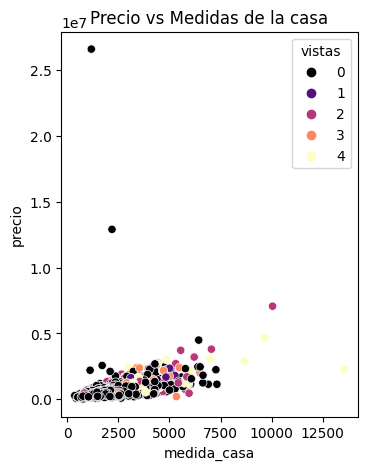

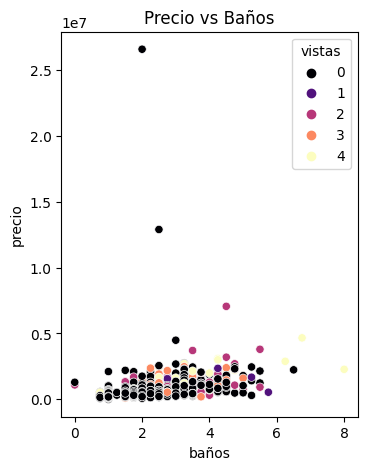

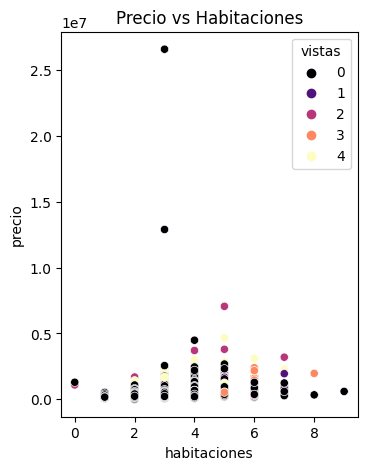

In [22]:
# Con el mapa de correlaciones anterior vemos que los precios tienen buena relación con las medidas de las casas,
# los baños e incluso las habitaciones y las vistas
# Por esta razón, enfrentaremos con gráficos de dispersión a las variables precios vs medidas, baños y habitaciones para ver como se distribuyen

f = plt.figure(figsize=(13, 5))
ax = f.add_subplot(131)
sns.scatterplot(x="medida_casa", y="precio", data = df_casas, hue="vistas", palette = "magma" , ax=ax)
ax.set_title("Precio vs Medidas de la casa")

f = plt.figure(figsize=(13,5))
ax = f.add_subplot(132)
sns.scatterplot(x="baños", y="precio", data = df_casas, hue="vistas", palette = "magma" , ax=ax)
ax.set_title("Precio vs Baños")

f = plt.figure(figsize=(13, 5))
ax = f.add_subplot(133)
sns.scatterplot(x="habitaciones", y="precio", data = df_casas, hue="vistas", palette = "magma" , ax=ax)
ax.set_title("Precio vs Habitaciones")

# Escenarios hipotéticos. Entrenamiento y validación.

## Hipótesis 1.
Realizaremos una regresión lineal solo de las variables numéricas del dataframe.

In [23]:
# Eliminamos las columnas categóricas y nos quedamos solo con las numéricas
col_off = ["direccion", "ciudad"]
df_hipot1 = df_casas.drop(col_off, axis=1)

In [24]:
df_hipot1

,precio,habitaciones,baños,medida_casa,medida_terreno,pisos,vistas_mar,vistas,condicion,fecha_const,fecha_reforma
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1974,0


In [25]:
# Definimos las variables independiente e dependiente
x_hipot1 = df_hipot1.drop("precio", axis=1)
y_hipot1= df_hipot1["precio"]

In [26]:
# Preparamos el train y el test data
from sklearn.model_selection import train_test_split
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [27]:
# Lanzamos la regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_hipot1_train, y_hipot1_train)

LinearRegression()

In [28]:
# Importamos MSE
from sklearn.metrics import mean_squared_error

# Predecimos los valores de entrenamiento
predict_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# MSE
mse_hipot1_train = mean_squared_error(y_true=y_hipot1_train, y_pred=predict_entrenamiento)
print("Error cuadrático medio train = " + str(mse_hipot1_train))

# Predecimos los valores test
predict_test = regresion_lineal.predict(x_hipot1_test)

# MSE
mse_hipot1_test = mean_squared_error(y_true=y_hipot1_test, y_pred=predict_test)
print("Error cuadrático medio test = " + str(mse_hipot1_test))

Error cuadrático medio train = 287726640063.58795
Error cuadrático medio test = 66237449398.91258


No hemos obtenido buenos resultados en este hipótesis ya que los resultados del MSE, sobre todo el test, están bastantes lejos de 0.
Vamos con otra hipótesis.

## Hipótesis 2.
Aplicaremos la técnica Label Encoder para convertir las variables categóricas en numéricas. He decidido utilizar esta técnica porque el one hot encoding aplicado a las variables categóricas con las que quiero trabajar me devuelve más de 4000 columnas.

In [29]:
# Importamos LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [30]:
# Asignamos LabelEncoder a las variables categóricas
le_direccion = LabelEncoder()
le_ciudad = LabelEncoder()


In [31]:
# Transformamos las columnas antiguas a las nuevas ya con la técnica aplicada
df_casas["direccion_n"] = le_direccion.fit_transform(df_casas["direccion"])
df_casas["ciudad_n"] = le_ciudad.fit_transform(df_casas["ciudad"])

In [32]:
# Quitamos las dos categóricas antiguas
df_casas_hip2 = df_casas.drop(["direccion", "ciudad"], axis = 1)

In [33]:
df_casas_hip2

,precio,habitaciones,baños,medida_casa,medida_terreno,pisos,vistas_mar,vistas,condicion,fecha_const,fecha_reforma,direccion_n,ciudad_n
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005,1507,36
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,1921,0,3853,35
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1966,0,2267,18
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1963,0,4216,3
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992,4305,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1954,1979,3404,35
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1983,2009,948,3
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,2009,0,3986,32
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1974,0,3454,35


In [34]:
# Creamos las variables dependientes e independientes
x_hipot2 = df_casas_hip2.drop("precio", axis = 1)
y_hipot2 = df_casas_hip2 ["precio"]

In [35]:
#  Preparamos el train y el test data
from sklearn.model_selection import train_test_split
x_hipot2_train, x_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(x_hipot2,y_hipot2, test_size=0.2, random_state=43)

In [36]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lin = LinearRegression()
regresion_lin.fit(x_hipot2_train, y_hipot2_train)

LinearRegression()

In [37]:
# Importamos MSE
from sklearn.metrics import mean_squared_error

# Predecimos los valores de entrenamiento
predict_entrenamiento = regresion_lin.predict(x_hipot2_train)

# MSE
mse_hipot2_train = mean_squared_error(y_true=y_hipot2_train, y_pred=predict_entrenamiento)
print("Error cuadrático medio train 2 = " + str(mse_hipot2_train))

# Predecimos los valores test
predict_test = regresion_lin.predict(x_hipot2_test)

# MSE
mse_hipot2_test = mean_squared_error(y_true=y_hipot2_test, y_pred=predict_test)
print("Error cuadrático medio test 2 = " + str(mse_hipot2_test))

Error cuadrático medio train 2 = 287389656773.7312
Error cuadrático medio test 2 = 66446784765.38059


En esta hipóteis seguimos estando lejos de 0, es decir, seguimos obteniendo unos resultados no muy buenos. Avanzamos a otra hipótesis.

## Hipótesis 3.

En esta hipótesis normalizaremos la variable objetivo (Precios)

In [38]:
# Creamos las variables dependientes e independientes
x_hipot3 = df_casas_hip2.drop("precio", axis = 1)
y_hipot3 = df_casas_hip2 ["precio"]

In [39]:
# Importamos y aplicamos StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))
y_hipot3=y_hipot3.reshape(1,-1)[0]

In [40]:
# Preparamos el train y el test data
x_hipot3_train, x_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(x_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [41]:
# Hacemos una regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipot3_train, y_hipot3_train)

LinearRegression()

In [42]:
# Importamos MSE
from sklearn.metrics import mean_squared_error

# Predecimos los valores de entrenamiento
predict_entrenamiento = regresion_lin.predict(x_hipot3_train)

# MSE
mse_hipot3_train = mean_squared_error(y_true=y_hipot3_train, y_pred=predict_entrenamiento)
print("Error cuadrático medio train 3 = " + str(mse_hipot3_train))

# Predecimos los valores test
predict_test = regresion_lin.predict(x_hipot3_test)

# MSE
mse_hipot3_test = mean_squared_error(y_true=y_hipot3_test, y_pred=predict_test)
print("Error cuadrático medio test 3 = " + str(mse_hipot3_test))

Error cuadrático medio train 3 = 382905023402.05054
Error cuadrático medio test 3 = 392913872835.0273


En esta hipótesis hemos obtenido los mejores resultados hasta el momento. No obstante, no son lo bueno que me gustaría. Probaremos con otro modelo a ver si podemos obtener mejores resultados.

##Hipótesis 4.

En este modelo vamos a normalizar todas las variables en busca de unos mejores resultados.

In [43]:
# Creamos las variables dependientes en independientes
x_hipot4 = df_casas_hip2.drop("precio", axis = 1)
y_hipot4 = df_casas_hip2 ["precio"]

In [44]:
# Importamos y aplicamos StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_hipot4 = scaler.fit_transform(x_hipot4)
y_hipot4 = scaler.fit_transform(y_hipot4.to_numpy().reshape(-1,1))
y_hipot4=y_hipot4.reshape(1,-1)[0]

In [45]:
 # Preparamos el train y el test data
x_hipot4_train, x_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(x_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [46]:
# Hacemos una regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_hipot4_train, y_hipot4_train)

LinearRegression()

In [47]:
# Importamos MSE
from sklearn.metrics import mean_squared_error

# Predecimos los valores de entrenamiento
predict_entrenamiento = regresion_lin.predict(x_hipot4_train)

# MSE
mse_hipot4_train = mean_squared_error(y_true=y_hipot4_train, y_pred=predict_entrenamiento)
print("Error cuadrático medio train 4 = " + str(mse_hipot4_train))

# Predecimos los valores test
predict_test = regresion_lin.predict(x_hipot4_test)

# MSE
mse_hipot4_test = mean_squared_error(y_true=y_hipot4_test, y_pred=predict_test)
print("Error cuadrático medio test 4 = " + str(mse_hipot4_test))

Error cuadrático medio train 4 = 12533026233460.37
Error cuadrático medio test 4 = 12584231684767.393


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Hemos obtenido bastante mejores resultados de los que habiamos obtenido hasta ahora. Vamos a intentar otro modelo para poder acercarnos bastante más a 0.


## Hipótesis 5

En este modelos vamos a utilizar otro tipo de escalado llamado MaxAbsScaler.

In [59]:
# Escalamos los datos
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
columnas = df_casas_hip2.columns
df_casas_hip2[columnas] = scaler.fit_transform(df_casas_hip2[columnas])

In [60]:
# Creamos las variables dependientes e independientes
x_hipot5 = df_casas_hip2.drop("precio", axis=1)
y_hipot5 = df_casas_hip2["precio"]

In [61]:
# Preparamos el train y el test data
x_hipot5_train, x_hipot5_test, y_hipot5_train, y_hipot5_test =train_test_split(x_hipot5, y_hipot5, test_size=0.20, random_state=43)

In [62]:
# Regresión lineal
regresion_lin = LinearRegression()
regresion_lin.fit(x_hipot5_train, y_hipot5_train)

LinearRegression()

In [63]:
# Fase de validación

# Predecimos los valores de entrenamiento
predic_entrenamiento = regresion_lin.predict(x_hipot5_train)

# MSE
mse_hipot5_train = mean_squared_error(y_true=y_hipot5_train, y_pred=predic_entrenamiento)
print("Error cuadrático medio train 5 = " + str(mse_hipot5_train))

# Predecimos los valores de test
predict_entrenamiento = regresion_lin.predict(x_hipot5_test)

# MSE
mse_hipot5_test = mean_squared_error(y_true=y_hipot5_test, y_pred=predict_entrenamiento)
print("Error cuadrático medio test 5 = " + str(mse_hipot5_test))

Error cuadrático medio train 5 = 0.0004064755796463128
Error cuadrático medio test 5 = 9.398040157864388e-05


Tachaaaannnnnn!! Con este escalado obtenemos los mejores resultados los cuales son muy buenos. Debemos recordar que el resultado del test se multiplica por 10 elevado a -5 siendo el siguiente:  0.00009398040157864388